In [105]:
using QuantumToolbox
using CairoMakie

CairoMakie.activate!(type = "svg")
include("../scripts/infidelities_funnctions.jl");

 We integrate the Hamiltonian in a rotating frame with rotating wave approximation

## Static motional frequency shift

Hamiltonian in rotating frame:

$$H=\hbar \Omega \hat{S}_\alpha (\hat{a}+\hat{a}^\dagger)+\hbar (\delta+\Delta)\hat{a}^\dagger\hat{a},$$

which is slightly modified from [PRA 105, 022437 (2022)](https://link.aps.org/doi/10.1103/PhysRevA.105.022437) to make it time-independent.

In [108]:
N = 30  
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0) #↓↓
ψ0= (sqrt(1/3)*basis(2,1) ⊗ basis(2,1) + sqrt(2/3)*basis(2,0) ⊗ basis(2,0)) ⊗ fock(N,0) #√1/3 ↓↓ + √2/3 ↑↑
infidelity_static_motional_shift_numerical(1,2e-1,ψ0)

0.021903275903965902

In [ ]:
N = 30  

σ1x=sigmax()⊗qeye(2)⊗qeye(N)
σ2x=qeye(2)⊗sigmax()⊗qeye(N)
a=qeye(2)⊗qeye(2)⊗destroy(N)

Ω=1.0
Δ=Ω*4
δ=2e-1*Ω

ϕ=2pi*Ω^2/Δ^2
U_ideal = exp(1im*ϕ*(σ1x+σ2x)^2)

H=Ω*(σ1x+σ2x)*(a+a')+(δ+Δ)*a'*a


Quantum Object:   type=Operator()   dims=[2, 2, 30]   size=(120, 120)   ishermitian=true
120×120 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 580 stored entries:
⎡⠐⢄⠀⠀⠀⠀⠀⠀⠀⠀⠺⣢⡀⠀⠀⠀⠀⠀⠀⠀⠳⣆⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠺⣢⡀⠀⠀⠀⠀⠀⠀⠈⠳⣆⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠺⣢⡀⠀⠀⠀⠀⠀⠀⠈⠳⣆⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠺⣢⡀⠀⠀⠀⠀⠀⠀⠈⠳⣆⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠺⣢⠀⠀⠀⠀⠀⠀⠀⠈⠳⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠺⣢⡀⠀⠀⠀⠀⠀⠀⠀⠐⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⣆⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠺⣢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣆⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠺⣢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣆⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠺⣢⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣆⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠺⣢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣆⎥
⎢⠹⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠫⡦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠹⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠫⡦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠹⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠫⡦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠹⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠫⡦⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠹⢦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠫⡦⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⢦⡀⠀⠀⠀⠀⠀⠀⠀⠫⡦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠹⢦⡀⠀⠀⠀⠀⠀⠀⠈⠫⡦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠹⢦⡀⠀⠀⠀⠀⠀⠀⠈⠫⡦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠹⢦⡀⠀⠀⠀⠀⠀⠀⠈⠫⡦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [89]:
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,0)
ψend = U_ideal * ψ0
# ψ_bell1= (basis(2,0) ⊗ basis(2,0) + 1im*basis(2,1) ⊗ basis(2,1)) / sqrt(2)
ψ_bell= (basis(2,1) ⊗ basis(2,1) + 1im*basis(2,0) ⊗ basis(2,0)) / sqrt(2)
tlist = [0,2pi/Δ] # a list of time points of interest
eop_ls = [
    a' * a,                      # number operator of cavity
    # (ψ_bell * ψ_bell')⊗qeye(N), # bell state 1
    ψend * ψend',              # ideal end state
];

In [91]:
sol = sesolve(H , ψ0, tlist; e_ops = eop_ls)
1-real(sol.expect[2, end])

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


0.016186463093388115

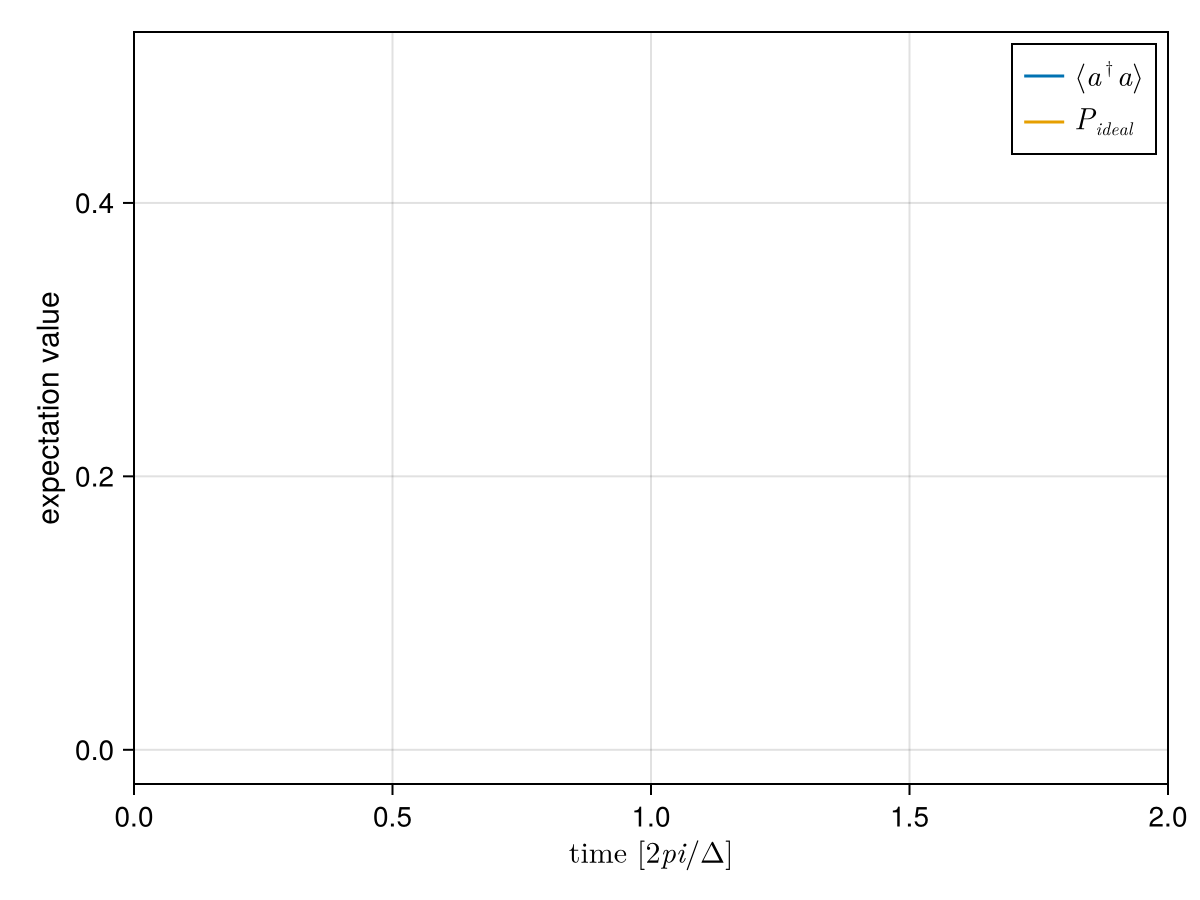

In [77]:
n = real.(sol.expect[1, :])
Pideal = real.(sol.expect[2, :])
# Plotting the results
fig_se = Figure()
ax_se = Axis(
    fig_se[1, 1],
    xlabel = L"time $[2pi/Δ]$", 
    ylabel = "expectation value", 
    xlabelsize = 15, 
    ylabelsize = 15,
)
# xlims!(ax_se, 0, 400)
lines!(ax_se, tlist/(2pi/Δ), n, label = L"$\langle a^\dagger a \rangle$")
lines!(ax_se, tlist/(2pi/Δ), Pideal, label = L"$P_{ideal}$")
axislegend(ax_se; position = :rt, labelsize = 15)
fig_se

## Trap anharmonicity

In [133]:
N = 500 

σ1x=sigmax()⊗qeye(2)⊗qeye(N)
σ2x=qeye(2)⊗sigmax()⊗qeye(N)
a=qeye(2)⊗qeye(2)⊗destroy(N)

Ω=1.0
Δ=Ω*4
ϵ=6e-5*Ω

ϕ=2pi*Ω^2/Δ^2
U_ideal = exp(1im*ϕ*(σ1x+σ2x)^2)

H=Ω*(σ1x+σ2x)*(a+a')+Δ*a'*a+6ϵ*(a'*a+(a'*a)^2)


Quantum Object:   type=Operator()   dims=[2, 2, 500]   size=(2000, 2000)   ishermitian=true
2000×2000 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 9980 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎥
⎢⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀

In [134]:
ψ0 = basis(2,1) ⊗ basis(2,1) ⊗ fock(N,50)
ψend = U_ideal * ψ0
# ψ_bell1= (basis(2,0) ⊗ basis(2,0) + 1im*basis(2,1) ⊗ basis(2,1)) / sqrt(2)
ψ_bell= (basis(2,1) ⊗ basis(2,1) + 1im*basis(2,0) ⊗ basis(2,0)) / sqrt(2)
tlist = range(0,2pi/Δ,200) # a list of time points of interest
eop_ls = [
    a' * a,                      # number operator of cavity
    # (ψ_bell * ψ_bell')⊗qeye(N), # bell state 1
    ψend * ψend',              # ideal end state
];

In [136]:
infidelity_trap_anharmonicity_numerical(Ω,ϵ,ψ0)

0.04158868630370616

In [123]:
sol = sesolve(H , ψ0, tlist; e_ops = eop_ls)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


Solution of time evolution
(return code: Success)
--------------------------
num_states = 1
num_expect = 2
ODE alg.: OrdinaryDiffEqTsit5.Tsit5{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}(OrdinaryDiffEqCore.trivial_limiter!, OrdinaryDiffEqCore.trivial_limiter!, static(false))
abstol = 1.0e-8
reltol = 1.0e-6


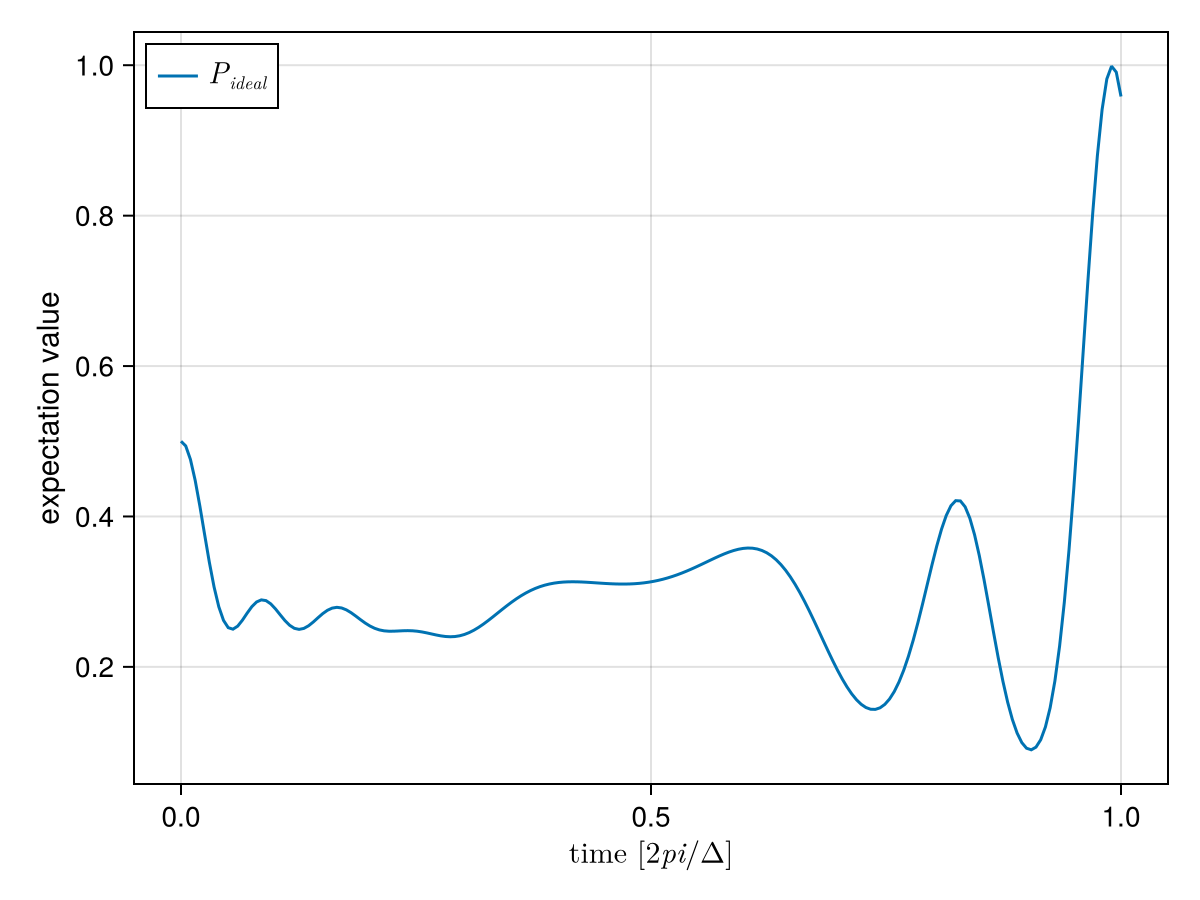

In [125]:
n = real.(sol.expect[1, :])
Pideal = real.(sol.expect[2, :])
# Plotting the results
fig_se = Figure()
ax_se = Axis(
    fig_se[1, 1],
    xlabel = L"time $[2pi/Δ]$", 
    ylabel = "expectation value", 
    xlabelsize = 15, 
    ylabelsize = 15,
)
# xlims!(ax_se, 0, 400)
# lines!(ax_se, tlist/(2pi/Δ), n, label = L"$\langle a^\dagger a \rangle$")
lines!(ax_se, tlist/(2pi/Δ), Pideal, label = L"$P_{ideal}$")
axislegend(ax_se; position = :lt, labelsize = 15)
fig_se

In [126]:
1-Pideal[end]

0.041579675061162114

## Field inhomogeneities